In [2]:
# import necessary packages.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [95]:
df = pd.read_csv("insurance.csv")

# Exploratory data analysis.

In [5]:
# Check missing data.
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
# Check for dtypes.
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [7]:
# summary statistics
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [8]:
df.describe(include=["O"])

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


In [67]:
# Correlations
df.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.527834
bmi,0.109272,1.000000,0.012759,0.132669
children,0.042469,0.012759,1.000000,0.161336
charges,0.527834,0.132669,0.161336,1.000000


- age is the most correlated feature for the charges.

In [9]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [7]:
# Split data based on data types.
categorical = [feature for feature in df.columns if df[feature].dtypes == "O"]
numerical = [feature for feature in df.columns if df[feature].dtypes != "O"]

In [11]:
categorical

['sex', 'smoker', 'region']

In [12]:
numerical

['age', 'bmi', 'children', 'charges']

## Visualizations!!


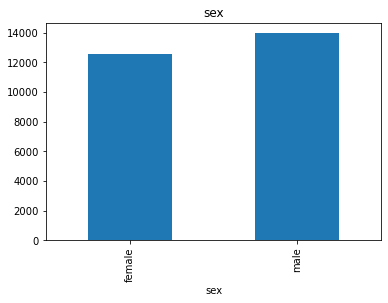

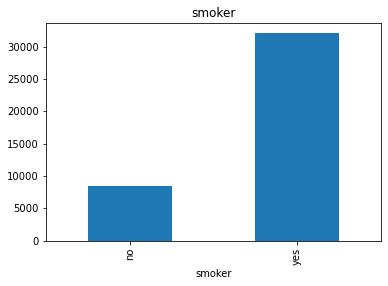

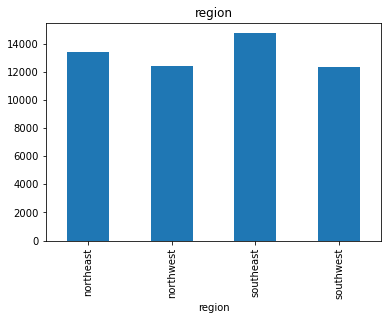

In [15]:
# Categorical features.
for feature in categorical:
    df.groupby(feature)["charges"].mean().plot.bar()
    plt.title(feature)
    plt.show()

 1 - Insurance cost for males is more than females.
 
 2 - if the client is smoker, the cost is more.
 
 3 - the most costly region is (SouthEast)

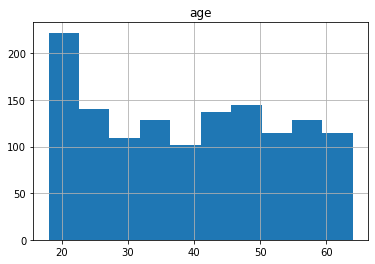

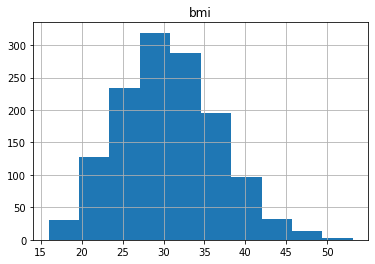

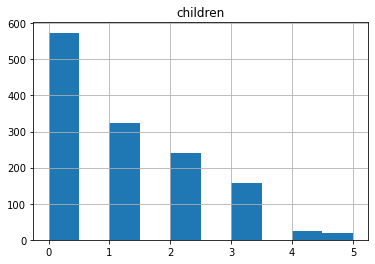

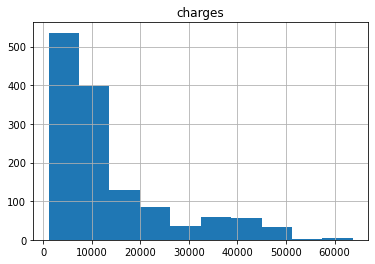

In [16]:
# Visualizing distribution of the data.
for feature in numerical:
    df[feature].hist()
    plt.title(feature)
    plt.show()

Charges feature may be skewed.

In [24]:
discrete = [feature for feature in numerical if len(df[feature].unique()) < 15]

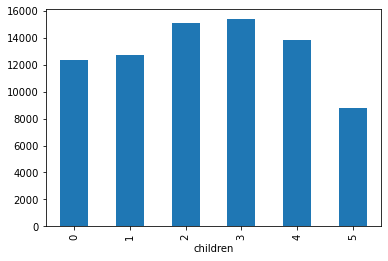

In [27]:
for feature in discrete:
    df.groupby(feature)["charges"].mean().plot.bar()
    plt.show()

- client with two or 3 childrens are the highest charges, and 4 and 5 are less.

# Releationships between feature and target feature

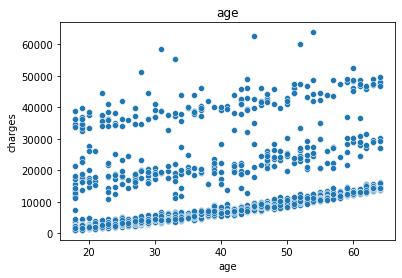

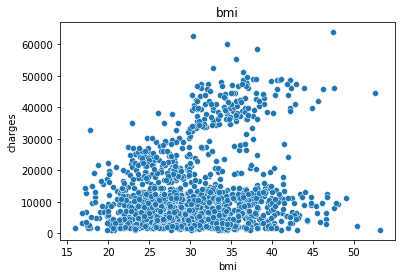

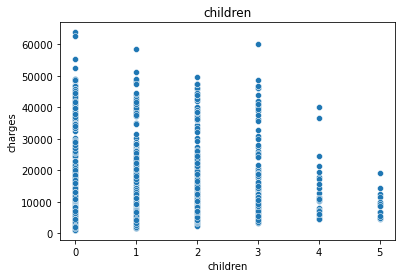

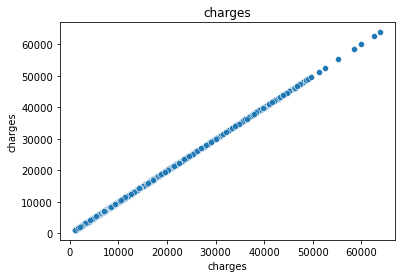

In [29]:
# Relationship between numerical and target feature.
for feature in numerical:
    sns.scatterplot(data=df,x=df[feature],y=df["charges"])
    plt.title(feature)
    plt.show()

Some of the features may have hetroctadasticity, we will check that later

# Probability Density Functions.

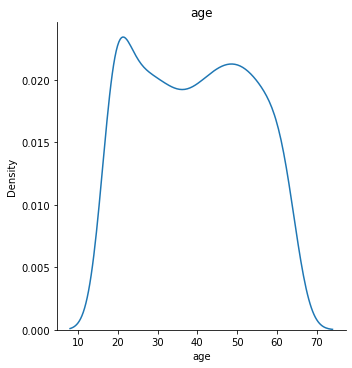

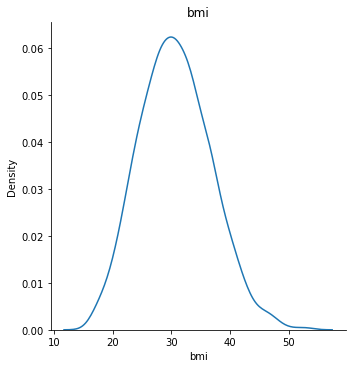

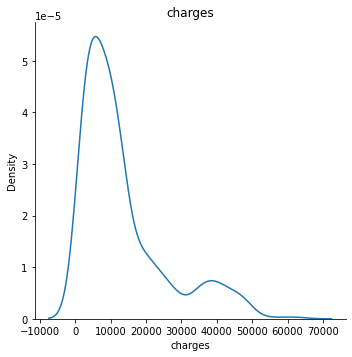

In [38]:
# Countinues variables, i will plot PDFs.

for feature in numerical:
    sns.displot(df[feature], kind="kde")
    plt.title(feature)
    plt.show()


- most of the clients has 30 and less bmi.
- most of the clients are 25 to 60 years old.
- most of the insurances costs between 10k to 25k.

C:\Users\asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

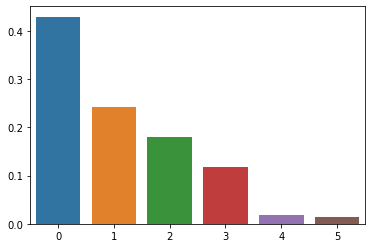

In [46]:
# PMF for children variable.
probabilities = df['children'].value_counts(normalize=True)    
sns.barplot(probabilities.index, probabilities.values)

- most of the insurance clients has no childrens.

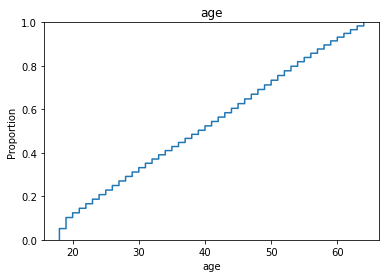

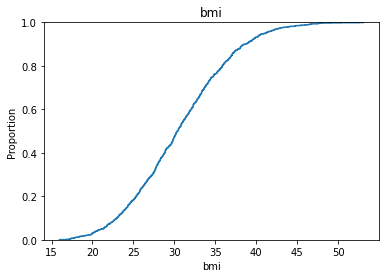

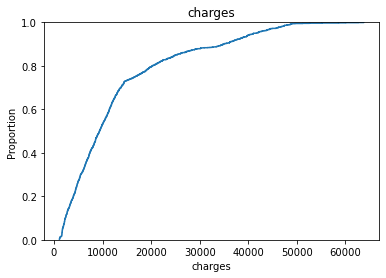

In [51]:
# Empirical Cumulative Distribution Plots.
for feature in numerical:
    sns.ecdfplot(data=df,x=feature)
    plt.title(feature)
    plt.show()

# Checking for skewness and outliers.
- if the skewness between -0.5 and 0.5 the data is fairly symmetrical.

### Skewness

In [53]:
df.skew()
# The charges feature is skewed, and i will deal with it later.

age         0.055673
bmi         0.284047
children    0.938380
charges     1.515880
dtype: float64

### Outliers

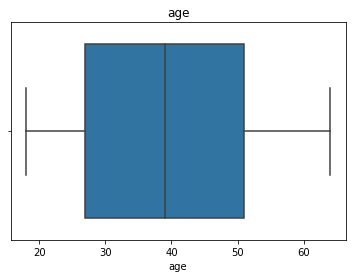

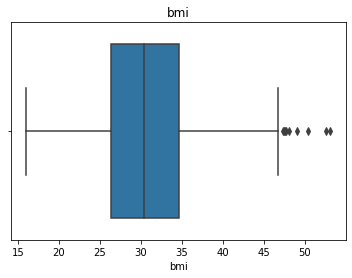

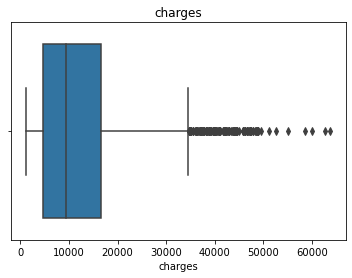

In [58]:
#for checking outliers I will use boxplot then i will assert the results with pd.kurtosis()
for feature in numerical:
    sns.boxplot(data=df,x=feature)
    plt.title(feature)
    plt.show()

- bmi and charges has outliers.

In [59]:
# Check for kurtoisis values.
df.kurtosis()

age        -1.245088
bmi        -0.050732
children    0.202454
charges     1.606299
dtype: float64

# Feature Engineering

-the charges variable are skewed and has outliers. so, I will log transform it

In [61]:
# Check if there any zeros or negative values.
(df["charges"].unique()<= 0).any()

False

In [100]:
df["charges"] = np.log(df["charges"])

For bmi feature it has acceptable kurtoisis value. So, I wil leave it

# Linear Regression Assumptions:

## 1 - Checking for Multicollinearity

In [91]:
# For Checking multicollinearity, I will use  VIF (Variable Inflation Factors.
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
numeric_data = df.select_dtypes(include=[np.number])
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(numeric_data.values, i) for i in range(numeric_data.shape[1])]
vif["features"] = numeric_data.columns


In [92]:
# If vif > 15, this means high multicollinearity which means the feature need to be dropped.
vif

,VIF Factor,features
0,11.265394,age
1,1.866820,children
2,12.306185,charges


- there is no multicollinearity.

-As shown above there is no multicollinearity in the data.

In [3]:
df= pd.read_csv("insurance_some_eng")

In [5]:
df= df.drop("Unnamed: 0",axis=1)

# 2 -  Linearity

In [8]:
df.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.527834
bmi,0.109272,1.000000,0.012759,0.132669
children,0.042469,0.012759,1.000000,0.161336
charges,0.527834,0.132669,0.161336,1.000000


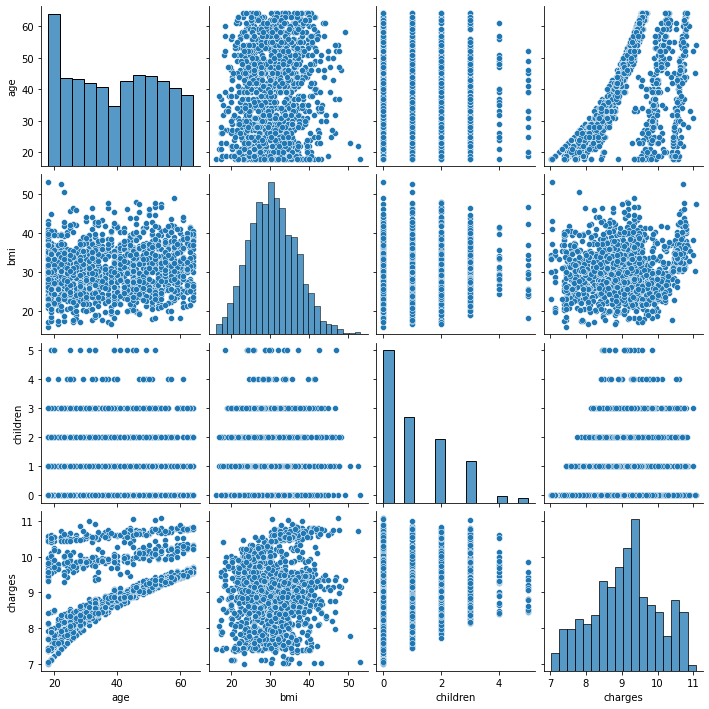

In [16]:
sns.pairplot(df,kind="scatter")

all the numerical features have linear relationship with the target variable, but it's weak.

### there's other assumptions i will check them back after fitting the model. 

## Feature engineering

In [3]:
df.head()

,Unnamed: 0,age,sex,bmi,children,smoker,region,charges
0,0,19,female,27.900,0,yes,southwest,9.734176
1,1,18,male,33.770,1,no,southeast,7.453302
2,2,28,male,33.000,3,no,southeast,8.400538
3,3,33,male,22.705,0,no,northwest,9.998092
4,4,32,male,28.880,0,no,northwest,8.260197


In [71]:
df= df.drop("Unnamed: 0",axis=1)

In [6]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,9.734176
1,18,male,33.770,1,no,southeast,7.453302
2,28,male,33.000,3,no,southeast,8.400538
3,33,male,22.705,0,no,northwest,9.998092
4,32,male,28.880,0,no,northwest,8.260197


## Scaling

## I will create two versions one with scaled target variable, and one with not scaled target variable

### Scaled target variable.

In [7]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [8]:
scaler.fit(df[["age","bmi","children"]])
df[["age","bmi","children"]] = scaler.transform(df[["age","bmi","children"]])

In [9]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,0.021739,female,0.321227,0.0,yes,southwest,9.734176
1,0.000000,male,0.479150,0.2,no,southeast,7.453302
2,0.217391,male,0.458434,0.6,no,southeast,8.400538
3,0.326087,male,0.181464,0.0,no,northwest,9.998092
4,0.304348,male,0.347592,0.0,no,northwest,8.260197


### Categorical Variables

In [10]:
# For Categorical features, i will use label encoding.
from sklearn.preprocessing import LabelEncoder
#sex
le = LabelEncoder()
le.fit(df.sex.drop_duplicates()) 
df.sex = le.transform(df.sex)
# smoker or not
le.fit(df.smoker.drop_duplicates()) 
df.smoker = le.transform(df.smoker)
#region
le.fit(df.region.drop_duplicates()) 
df.region = le.transform(df.region)

In [11]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,0.021739,0,0.321227,0.0,1,3,9.734176
1,0.000000,1,0.479150,0.2,0,2,7.453302
2,0.217391,1,0.458434,0.6,0,2,8.400538
3,0.326087,1,0.181464,0.0,0,1,9.998092
4,0.304348,1,0.347592,0.0,0,1,8.260197


### train_test_splitting

In [12]:
from sklearn.model_selection import train_test_split
x = df.drop("charges",axis=1)
y = df[["charges"]]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)

## Add Polynomial features to improve model performance.

In [15]:
from sklearn.preprocessing import PolynomialFeatures
quad = PolynomialFeatures (degree = 2)
x_quad = quad.fit_transform(x)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(x_quad, y, test_size=0.30, random_state=42)

In [18]:
X_train

array([[1.        , 0.93478261, 0.        , ..., 0.        , 0.        ,
        1.        ],
       [1.        , 0.60869565, 1.        , ..., 0.        , 0.        ,
        9.        ],
       [1.        , 0.7826087 , 0.        , ..., 0.        , 0.        ,
        4.        ],
       ...,
       [1.        , 0.86956522, 1.        , ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.41304348, 0.        , ..., 1.        , 3.        ,
        9.        ],
       [1.        , 0.80434783, 1.        , ..., 0.        , 0.        ,
        9.        ]])

## Model Building 

### LinearRegression

In [19]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [20]:
y_pred = reg.predict(X_test)

In [25]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
adj_r2 = (1 - (1 - r2) * ((X_train.shape[0] - 1) / (X_train.shape[0] - X_train.shape[1] - 1)))


In [26]:
reg.coef_

array([[ 3.66449500e-16,  2.09933081e+00, -1.37622653e-01,
         7.77556901e-01,  1.27243976e+00,  7.38673565e-01,
        -1.08504249e-01, -4.00822611e-01,  1.99855280e-01,
         3.56738816e-02, -9.40942856e-01, -1.49924383e+00,
         1.51103455e-01, -1.37622653e-01,  2.21057974e-01,
        -6.75407107e-03,  9.83660668e-02, -2.15416548e-03,
        -8.87551921e-01,  2.58949579e-01,  1.83542294e+00,
        -1.12147403e-01, -3.64893415e-01, -6.04175334e-01,
        -6.34613910e-02,  7.38673565e-01,  7.14985613e-02,
         1.02804502e-02]])

In [33]:
df.loc[:,df.columns[0:2]]

,age,sex
0,0.021739,0
1,0.000000,1
2,0.217391,1
3,0.326087,1
4,0.304348,1
...,...,...
1333,0.695652,1
1334,0.000000,0
1335,0.000000,0
1336,0.065217,0


# Regression Report

In [34]:
import statsmodels.api as sm
X_train= sm.add_constant(X_train)
model = sm.OLS(y_train,X_train)

In [35]:
results= model.fit()
results.params

const    7.784496
x1       2.099331
x2      -0.137623
x3       0.777557
x4       1.272440
x5       0.738674
x6      -0.108504
x7      -0.400823
x8       0.199855
x9       0.035674
x10     -0.940943
x11     -1.499244
x12      0.151103
x13     -0.137623
x14      0.221058
x15     -0.006754
x16      0.098366
x17     -0.002154
x18     -0.887552
x19      0.258950
x20      1.835423
x21     -0.112147
x22     -0.364893
x23     -0.604175
x24     -0.063461
x25      0.738674
x26      0.071499
x27      0.010280
dtype: float64

In [36]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     190.8
Date:                Sun, 26 Dec 2021   Prob (F-statistic):               0.00
Time:                        17:00:24   Log-Likelihood:                -393.80
No. Observations:                 936   AIC:                             839.6
Df Residuals:                     910   BIC:                             965.5
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.7845      0.101     77.088      0.000       7.586       7.983
x1             2.0993      0.193     10.876      0.000       1.721       2.478
x2            -0.1376      0.040     -3.451      0.001      -0.216      -0.059
x3             0.7776      0.329      2.366      0.018       0.133       1.422
x4             1.2724      0.226      5.630      0.000       0.829       1.716
x5             0.7387      0.049     14.961      0.000       0.642       0.836
x6            -0.1085      0.051     -2.128      0.034      -0.209      -0.008
x7            -0.4008      0.162     -2.471      0.014      -0.719      -0.082
x8             0.1999      0.081      2.465      0.014       0.041       0.359
x9             0.0357      0.254      0.140      0.888      -0.463       0.534
x10           -0.9409      0.179     -5.261      0.000      -1.292      -0.590
x11           -1.4992      0.101    -14.912      0.000      -1.697      -1.302
x12            0.1511      0.037      4.039      0.000       0.078       0.225
x13           -0.1376      0.040     -3.451      0.001      -0.216      -0.059
x14            0.2211      0.156      1.414      0.158      -0.086       0.528
x15           -0.0068      0.103     -0.065      0.948      -0.209       0.196
x16            0.0984      0.062      1.588      0.113      -0.023       0.220
x17           -0.0022      0.023     -0.096      0.924      -0.046       0.042
x18           -0.8876      0.364     -2.440      0.015      -1.601      -0.174
x19            0.2589      0.338      0.767      0.443      -0.404       0.922
x20            1.8354      0.193      9.509      0.000       1.457       2.214
x21           -0.1121      0.075     -1.489      0.137      -0.260       0.036
x22           -0.3649      0.193     -1.890      0.059      -0.744       0.014
x23           -0.6042      0.131     -4.628      0.000      -0.860      -0.348
x24           -0.0635      0.045     -1.399      0.162      -0.153       0.026
x25            0.7387      0.049     14.961      0.000       0.642       0.836
x26            0.0715      0.028      2.543      0.011       0.016       0.127
x27            0.0103      0.012      0.827      0.408      -0.014       0.035
==============================================================================
Omnibus:                      669.531   Durbin-Watson:                   2.090
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7563.312
Skew:                           3.299   Prob(JB):                         0.00
Kurtosis:                      15.264   Cond. No.                     1.35e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.57e-28. This might indicate